**Nama**: Surya Erlamba <br>
**NIM** : 12220020

---
1. Dari mana diambil : data diambil dari Kaggle.com.
2. Bagaimana proses pengambilan datanya : dataset dibuat dengan mengkombinasikan dari berbagai datasets yang sudah ada. Datasets dikumpulkan dengan observasi, total dari observasi ada 1190, duplikat data 272 observasi, dan final dataset 918 observasi.
3. jumlah sample data : jumlah sampel data ada 918.
4. Jumlah fitur data : 11 fitur data.
5. Distribusi kelas (jika klasifikasi) : HeartDisease: output class [1: heart disease, 0: Normal]




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UTS Statistika/heart.csv')

In [ ]:
# tampil sepuluh data pertama
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Text(0.5, 1.0, 'Jumlah Data Setiap Kelas')

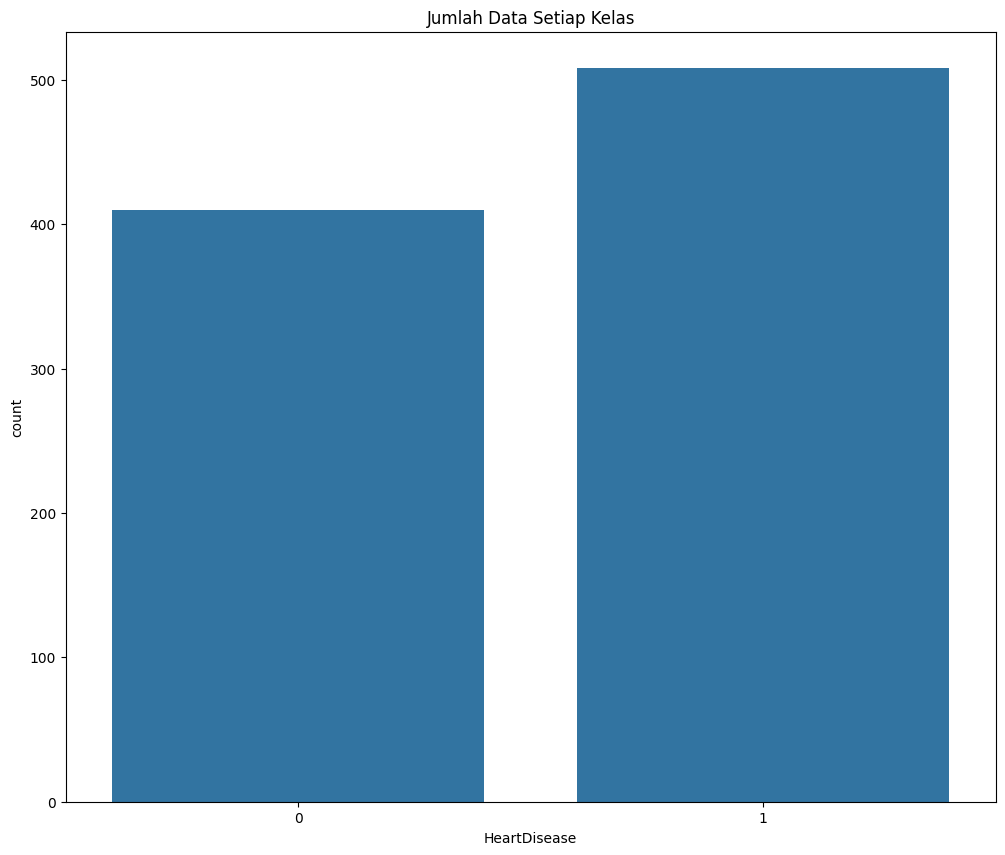

In [ ]:
#tampilkan statistik dengan bar
plt.figure(figsize=(12,10))
sns.countplot(x="HeartDisease", data=df)
plt.title('Jumlah Data Setiap Kelas')

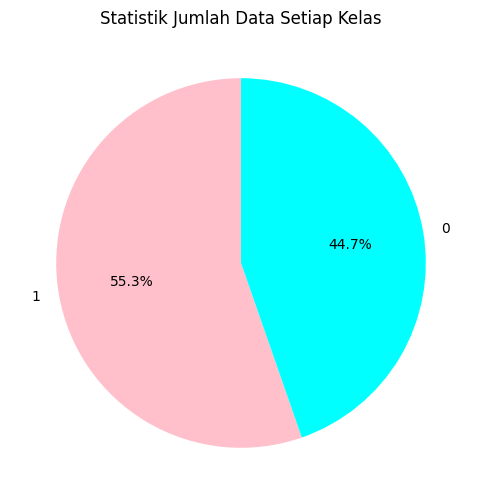

In [ ]:
# tampil statistik dengan pie
# Tampilkan statistik jumlah data setiap kelas dalam Pie Chart
class_counts = df['HeartDisease'].value_counts()
colors = 'pink', 'cyan'
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Statistik Jumlah Data Setiap Kelas')
plt.show()


In [ ]:
# Menampilkan statistik (Mean, Median, Mode, Standard Deviation, dan Kuartil) dari setiap fitur data
print("\nStatistik Fitur Data:")
df.describe()


Statistik Fitur Data:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


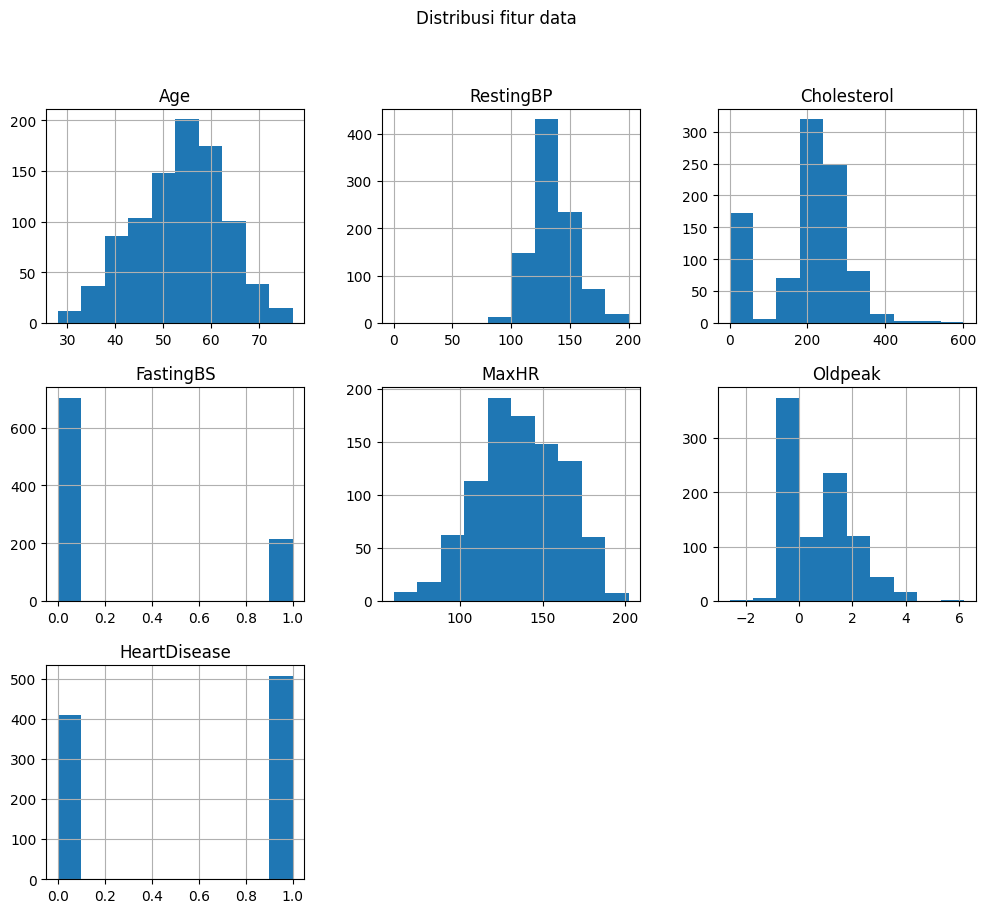

In [ ]:
# Menampilkan distribusi dari fitur dengan Histogram
df.hist(figsize=(12,10))
plt.suptitle('Distribusi fitur data')
plt.show()

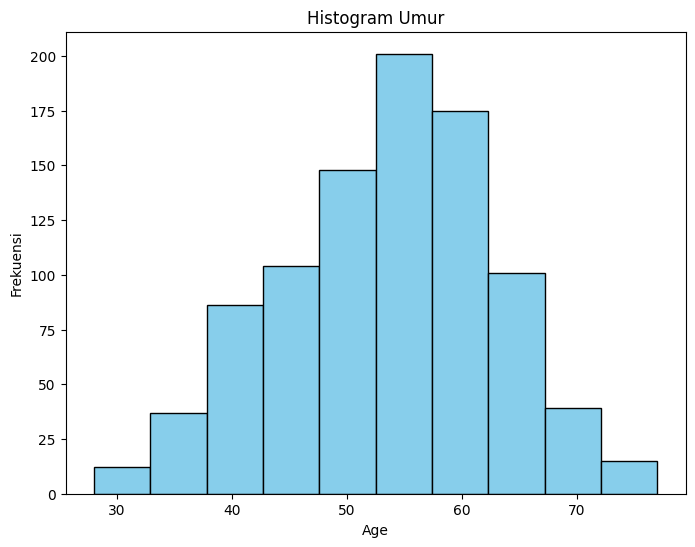

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.title('Histogram Umur')
plt.show()

In [ ]:
# mencari rata rata umur yang terkena penyakit
rata_rata_penyakit_jantung_koroner = df.groupby('HeartDisease')['Age'].mean()
print("rata-rata umur tanpa penyakit Heart Disease (0):", rata_rata_penyakit_jantung_koroner[0])
print("rata-rata umur penyakit dengan Heart Disease (1):", rata_rata_penyakit_jantung_koroner[1])

rata-rata umur tanpa penyakit Heart Disease (0): 50.551219512195125
rata-rata umur penyakit dengan Heart Disease (1): 55.8996062992126


In [ ]:
df['Oldpeak'].max()

6.2

<Figure size 1000x600 with 0 Axes>

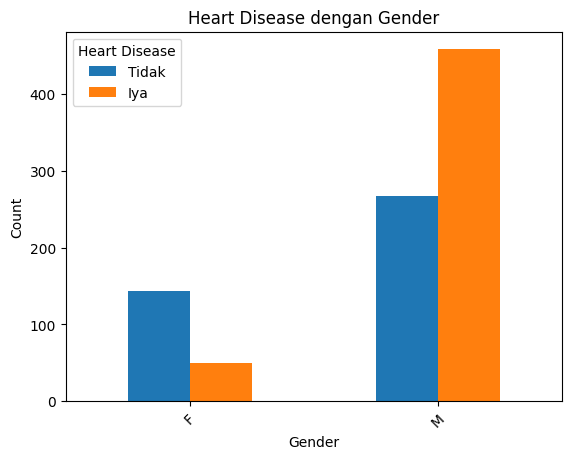

In [ ]:
# perbandingan gender pada data
gender_heart_disease_counts = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
gender_heart_disease_counts.plot(kind='bar', stacked=False)
plt.title('Heart Disease dengan Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Tidak', 'Iya'])
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

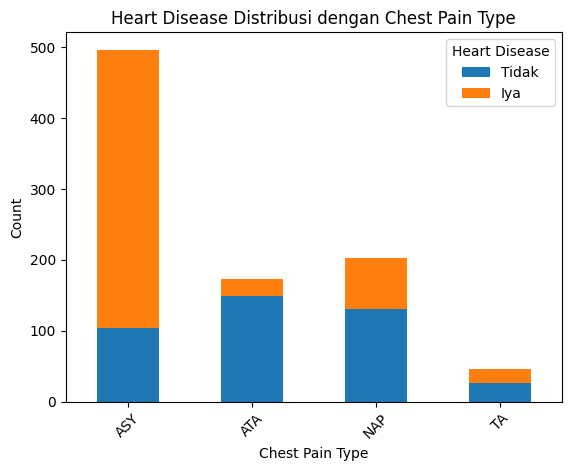

In [ ]:
# Apa saja jenis nyeri dada (ChestPainType) yang ada dalam kumpulan data
chest_pain_heart_disease_counts = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
chest_pain_heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribusi dengan Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Tidak', 'Iya'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
chest_pain_heart_disease_counts

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


In [ ]:
# mencari statistik pada cholesterol level
cholesterol_heart_disease_counts = df.groupby('HeartDisease')['Cholesterol']

print("Mean Cholesterol Level:", cholesterol_heart_disease_counts.mean())
print("Median Cholesterol Level:", cholesterol_heart_disease_counts.median())
print("Minimum Cholesterol Level:", cholesterol_heart_disease_counts.min())
print("Maximum Cholesterol Level:", cholesterol_heart_disease_counts.max())

Mean Cholesterol Level: HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64
Median Cholesterol Level: HeartDisease
0    227.0
1    217.0
Name: Cholesterol, dtype: float64
Minimum Cholesterol Level: HeartDisease
0    0
1    0
Name: Cholesterol, dtype: int64
Maximum Cholesterol Level: HeartDisease
0    564
1    603
Name: Cholesterol, dtype: int64


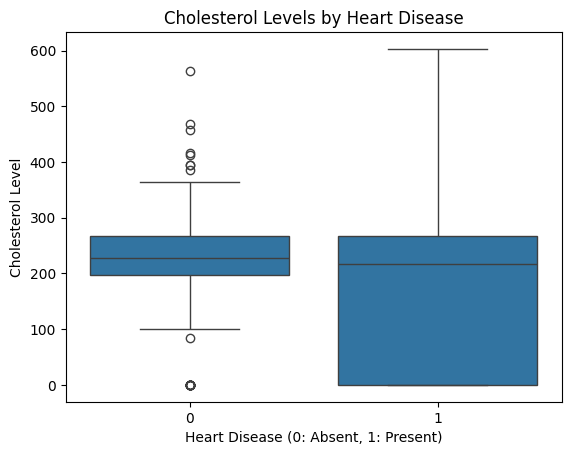

In [ ]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (0: Absent, 1: Present)')
plt.ylabel('Cholesterol Level')
plt.show()

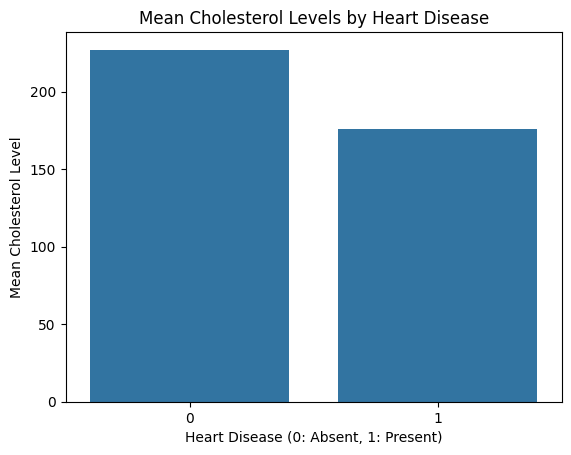

In [ ]:
# Calculate the mean cholesterol levels
mean_cholesterol = df.groupby('HeartDisease')['Cholesterol'].mean().reset_index()

# Create a bar plot to visualize mean cholesterol levels
sns.barplot(x='HeartDisease', y='Cholesterol', data=mean_cholesterol)
plt.title('Mean Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (0: Absent, 1: Present)')
plt.ylabel('Mean Cholesterol Level')
plt.show()

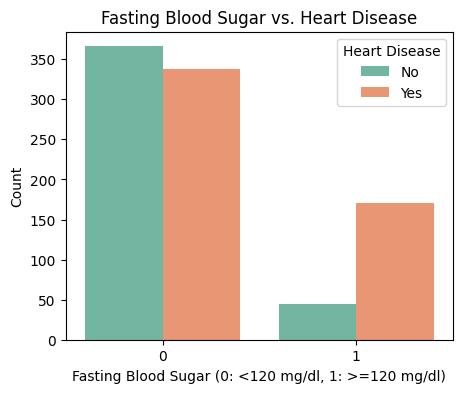

In [ ]:
# fasting blood sugar pada pasien penyakit jantung koroner
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='FastingBS', hue='HeartDisease', palette='Set2')
plt.title('Fasting Blood Sugar vs. Heart Disease')
plt.xlabel('Fasting Blood Sugar (0: <120 mg/dl, 1: >=120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

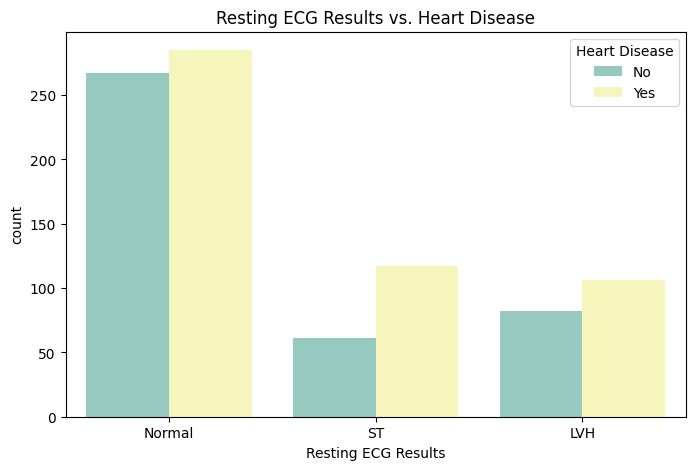

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RestingECG', hue='HeartDisease', palette='Set3')
plt.title('Resting ECG Results vs. Heart Disease')
plt.xlabel('Resting ECG Results')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

In [ ]:
# max HR
max_hr_heart_disesase_count = df.groupby('HeartDisease')['MaxHR'].max()
print("max Heart rate tanpa penyakit jantung koroner (0) :", max_hr_heart_disesase_count[0])
print("max Heart rate dengan penyakit jantung koroner (1) :", max_hr_heart_disesase_count[1])

max Heart rate tanpa penyakit jantung koroner (0) : 202
max Heart rate dengan penyakit jantung koroner (1) : 195


In [ ]:
# pasien dengan angina
angina_heart_disease_counts = df.groupby(['Sex','ExerciseAngina', 'HeartDisease']).size().unstack()
angina_heart_disease_counts

HeartDisease          0    1
Sex ExerciseAngina          
F   N               127   23
    Y                16   27
M   N               228  169
    Y                39  289

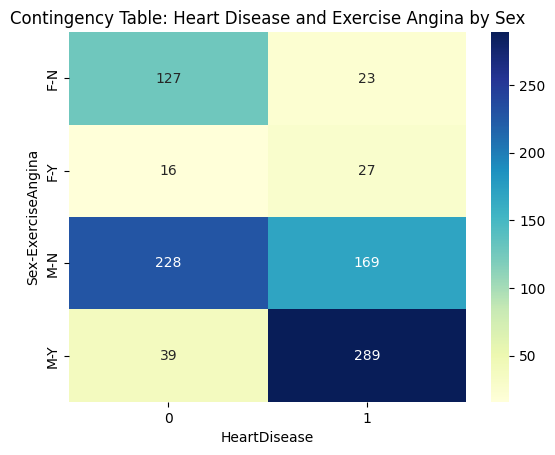

In [ ]:
sns.heatmap(angina_heart_disease_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Contingency Table: Heart Disease and Exercise Angina by Sex')
plt.show()

Text(0.5, 1.0, 'ST Slope vs. Heart Disease')

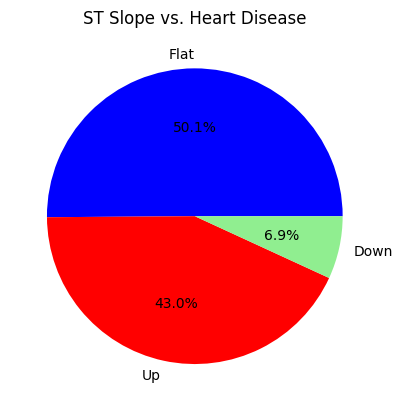

In [ ]:
# statsitik st slope pada penyakit jantung koroner
slope_counts = df['ST_Slope'].value_counts()
plt.pie(slope_counts, labels=slope_counts.index, autopct='%1.1f%%',colors=['blue','red','lightgreen'])
plt.title('ST Slope vs. Heart Disease')

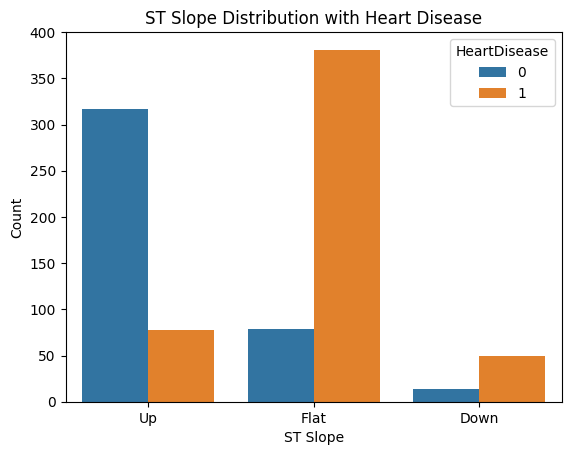

In [ ]:
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
plt.title('ST Slope Distribution with Heart Disease')
plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.show()

In [ ]:
st_slope_with_heart_disease = df.groupby(['HeartDisease', 'ST_Slope']).size().unstack()
st_slope_with_heart_disease


ST_Slope,Down,Flat,Up
HeartDisease,,,
0,14,79,317
1,49,381,78


In [ ]:
# old peak
oldpeak_heart_disesase_count = df.groupby('HeartDisease')['Oldpeak'].max()
print("old peak maximux pada pasien jantung koroner",oldpeak_heart_disesase_count[1].max())
print("old peak minimum pada pasien jantung koroner",oldpeak_heart_disesase_count[1].min())
print("old peak rata rata pada pasien jantung koroner",oldpeak_heart_disesase_count[1].mean())

old peak maximux pada pasien jantung koroner 6.2
old peak minimum pada pasien jantung koroner 6.2
old peak rata rata pada pasien jantung koroner 6.2


## Distribusi Fitur Data

- **Age:** Rata-rata umur pasien yang mengalami penyakit jantung adalah 55 tahun.

- **Sex:** Lebih banyak pasien berjenis kelamin laki-laki yang mengalami penyakit jantung koroner.

- **Chest Pain Type:** Tipe nyeri dada yang paling umum terkait dengan penyakit jantung adalah ASY.

- **Resting BP:** Tekanan darah pasien ketika mereka sedang dalam keadaan istirahat paling tinggi adalah 200, dengan rata-rata 132.

- **Cholesterol:** Tingkat kolesterol paling tinggi pada pasien dengan penyakit jantung koroner adalah 603. Kolesterol mengukur jumlah lemak dalam darah, dan tingkat yang tinggi dapat meningkatkan risiko penyakit jantung.

- **Fasting BS:** Pasien dengan kadar gula darah puasa di bawah 120 mg/dL lebih banyak yang mengalami penyakit jantung koroner.

- **Resting ECG:** Pasien dengan kondisi resting ECG normal lebih banyak yang terkena penyakit jantung koroner. ECG merekam aktivitas listrik jantung.

- **Max HR:** Denyut jantung maksimum pada pasien dengan penyakit jantung adalah 195, sedangkan tanpa penyakit jantung adalah 202.

- **Exercise Angina:** Pasien dengan angina atau angin duduk berpotensi terkena penyakit jantung koroner.

- **ST_Slope:** Rata-rata segmen ST puncak pada pasien adalah flat, menunjukkan bahwa tidak ada perubahan signifikan dalam aktivitas listrik jantung selama latihan.

- **Old Peak:** memberikan informasi tentang bagaimana jantung merespon aktivitas fisik dan sejauh mana aktivitas listrik jantung mengalami penurunan setelah latihan. Semakin besar nilai "Oldpeak," semakin dalam depresi ST, dan ini bisa menjadi pertanda adanya masalah kesehatan pada jantung. Pada pasien jantung koroner oldpeak paling tinggi adalah 6.2.

- **Heart Disease:** Dalam dataset terdapat 918 pasien, di mana 508 pasien menderita penyakit jantung koroner, dan 410 pasien tidak menderita penyakit jantung koroner.

<h1>DATA CLEANSING<h1>


In [ ]:
df1 =df.select_dtypes(exclude=object)
df2 = df.select_dtypes(include=object)
df3= df1.drop('HeartDisease',axis=1)

df1.drop(index=df1[df1['RestingBP']==0].index,inplace=True)

In [ ]:
df1.dtypes

,0
Age,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
MaxHR,int64
Oldpeak,float64
HeartDisease,int64


In [ ]:
df2.dtypes

,0
Sex,object
ChestPainType,object
RestingECG,object
ExerciseAngina,object
ST_Slope,object


In [ ]:
# rubah categorical data menjadi  numerik
for i in range(0, df2.shape[1]):
  df2.iloc[:,i] = lab.fit_transform(df2.iloc[:,i])

In [ ]:
df2.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [ ]:
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(df[column].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [ ]:
for column in df2.columns:
    print(df2[column].value_counts())


Sex
1    725
0    193
Name: count, dtype: int64
ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64
RestingECG
1    552
0    188
2    178
Name: count, dtype: int64
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


**Sex** <br>
1 untuk laki laki <br>
0 untuk perempuan

**Chest Pain Types** <br>
0 untuk ASY <br>
1 untuk NAP <br>
2 untuk ATA <br>
3 untuk TA <br>

**RestingECG** <br>
0 untuk LVH <br>
1 untuk Normal <br>
2 untuk ST <br>

**ExerciseAngina** <br>
0 untuk N <br>
1 untuk Y <br>

**ST_Slope** <br>
0 untuk Down <br>
1 untuk Flat <br>
2 untuk Up <br>

In [ ]:
# menggabungkan df1 dan df2 menjadi df
df = pd.concat([df1,df2], axis=1)

In [ ]:
df.isna().sum()

,0
Age,1
RestingBP,1
Cholesterol,1
FastingBS,1
MaxHR,1
Oldpeak,1
HeartDisease,1
Sex,0
ChestPainType,0
RestingECG,0


In [ ]:
df =df.dropna()

In [ ]:
df.isna().sum()

,0
Age,0
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
Oldpeak,0
HeartDisease,0
Sex,0
ChestPainType,0
RestingECG,0


In [ ]:
df.duplicated().sum()

0

<h1>Model Machine Learning<h1>


In [ ]:
# memisahkan atribut dan label
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [ ]:
# split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=21)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# membuat sebuah fungsi untuk mencari model
def all(model):
  model.fit(X_train_scaled, y_train)
  predict = model.predict(X_test_scaled)

  print(confusion_matrix(predict, y_test))
  print(classification_report(predict, y_test))

#knn


In [ ]:
param_grid_knn = {
    'n_neighbors': list(range(1, 21, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

# Dapatkan hyperparameter terbaik
best_params_knn = grid_search_knn.best_params_

# Tampilkan hyperparameter terbaik
print("Hyperparameter terbaik untuk KNN:", best_params_knn)

Hyperparameter terbaik untuk KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
model1 = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')
all(model1)

[[63  9]
 [13 99]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        72
         1.0       0.92      0.88      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



#Decision Tree Classifier


In [ ]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train_scaled, y_train)

# Dapatkan hyperparameter terbaik
best_params_dt = grid_search_dt.best_params_

# Tampilkan hyperparameter terbaik
print("Hyperparameter terbaik untuk Decision Tree:", best_params_dt)

Hyperparameter terbaik untuk Decision Tree: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [ ]:
model2 = DecisionTreeClassifier(max_depth=None, max_features='log2', min_samples_leaf=4, min_samples_split=10)
all(model2)

[[61 26]
 [15 82]]
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75        87
         1.0       0.76      0.85      0.80        97

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



#Gaussian Naive Bayes

In [ ]:
# Naive Bayes
model3 = GaussianNB()
all(model3)

[[67 14]
 [ 9 94]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85        81
         1.0       0.87      0.91      0.89       103

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



#Support Vector Machine

In [ ]:
# Tentukan parameter grid yang ingin diuji
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Inisialisasi model Support Vector Machine
svc_model = SVC()

# Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5)
grid_search_svc.fit(X_train_scaled, y_train)

# Dapatkan hyperparameter terbaik
best_params_svc = grid_search_svc.best_params_

# Tampilkan hyperparameter terbaik
print("Hyperparameter terbaik untuk Support Vector Machine:", best_params_svc)

Hyperparameter terbaik untuk Support Vector Machine: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Support Vector Machine
model4 = SVC(C=1, degree=2, gamma='scale', kernel = 'rbf')
all(model4)

[[62 10]
 [14 98]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        72
         1.0       0.91      0.88      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.87      0.87       184



#random forest classifier


In [ ]:
param_grid_rf = {
    'n_estimators':[50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

print("hyperparameter terbaik untuk Random Forest", best_params_rf)

hyperparameter terbaik untuk Random Forest {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [ ]:
# Random Forest Classifier
model5 = RandomForestClassifier(max_depth=None, max_features= 'sqrt', n_estimators= 200)
all(model5)

[[59 12]
 [17 96]]
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80        71
         1.0       0.89      0.85      0.87       113

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



#gradient boosting

In [ ]:
# Tentukan parameter grid yang ingin diuji (dengan jumlah kombinasi yang lebih sedikit)
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier()

# Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5)
grid_search_gb.fit(X_train_scaled, y_train)

# Dapatkan hyperparameter terbaik
best_params_gb = grid_search_gb.best_params_

# Tampilkan hyperparameter terbaik
print("Hyperparameter terbaik untuk Gradient Boosting Classifier:", best_params_gb)

Hyperparameter terbaik untuk Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
# Gradient boosting
model6 = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
all(model6)

[[64 12]
 [12 96]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        76
         1.0       0.89      0.89      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Model yang paling akurat adalah Gradient boosting <br>
True Positives (TP): 6 - Kasus di mana model memprediksi kelas positif, dan kelas sebenarnya juga positif.

False Positives (FP): 12 - Kasus di mana model memprediksi kelas positif, tetapi kelas sebenarnya adalah negatif.

False Negatives (FN): 12 - Kasus di mana model memprediksi kelas negatif, tetapi kelas sebenarnya adalah positif.

True Negatives (TN): 96 - Kasus di mana model memprediksi kelas negatif, dan kelas sebenarnya juga negatif.

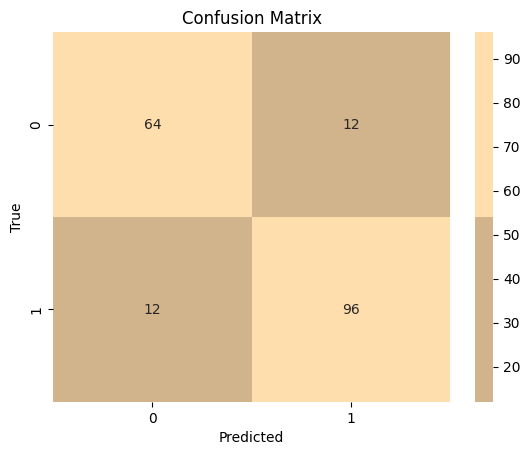

In [ ]:
cm = confusion_matrix(y_test, model6.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap=['tan','navajowhite'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
klasifikasi = {"Age":[58],
               "RestingBP":[120],
               "Cholesterol":[340],
               "FastingBS":	[0],
               "MaxHR": [172],
               "Oldpeak":	[0],
               "Sex": [0],
               "ChestPainType":[2],
               "RestingECG": [1],
               "ExerciseAngina":[0],
               "ST_Slope":[2]}

df_predict = pd.DataFrame(klasifikasi)

In [ ]:
prediksi = model6.predict(df_predict)
if prediksi[0] == 0:
  print("pasien normal")
else :
  print("pasien didiagnosa penyakit jantung koroner")

pasien normal


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import joblib

# Simpan model ke dalam file
joblib.dump(model6, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']